# Global Population

This notebook explores historical global population trends using World Bank data (1960–2023). Through visualizations and statistical insights, we aim to uncover patterns, growth rates, and potential forecasting challenges for time series modeling. This analysis sets the foundation for selecting the best predictive models to understand future population dynamics.


In [1]:
import pandas as pd
from src.DataPreprocessor import DataPreprocessor

# World Bank

The World Bank is like a cooperative, made up of 189 member countries. These member countries, or shareholders, are represented by a Board of Governors, who are the ultimate policymakers at the World Bank. Generally, the governors are member countries' ministers of finance or ministers of development. They meet once a year at the Annual Meetings of the Boards of Governors of the World Bank Group and the International Monetary Fund.

Source:
https://data.worldbank.org/indicator/SP.POP.TOTL

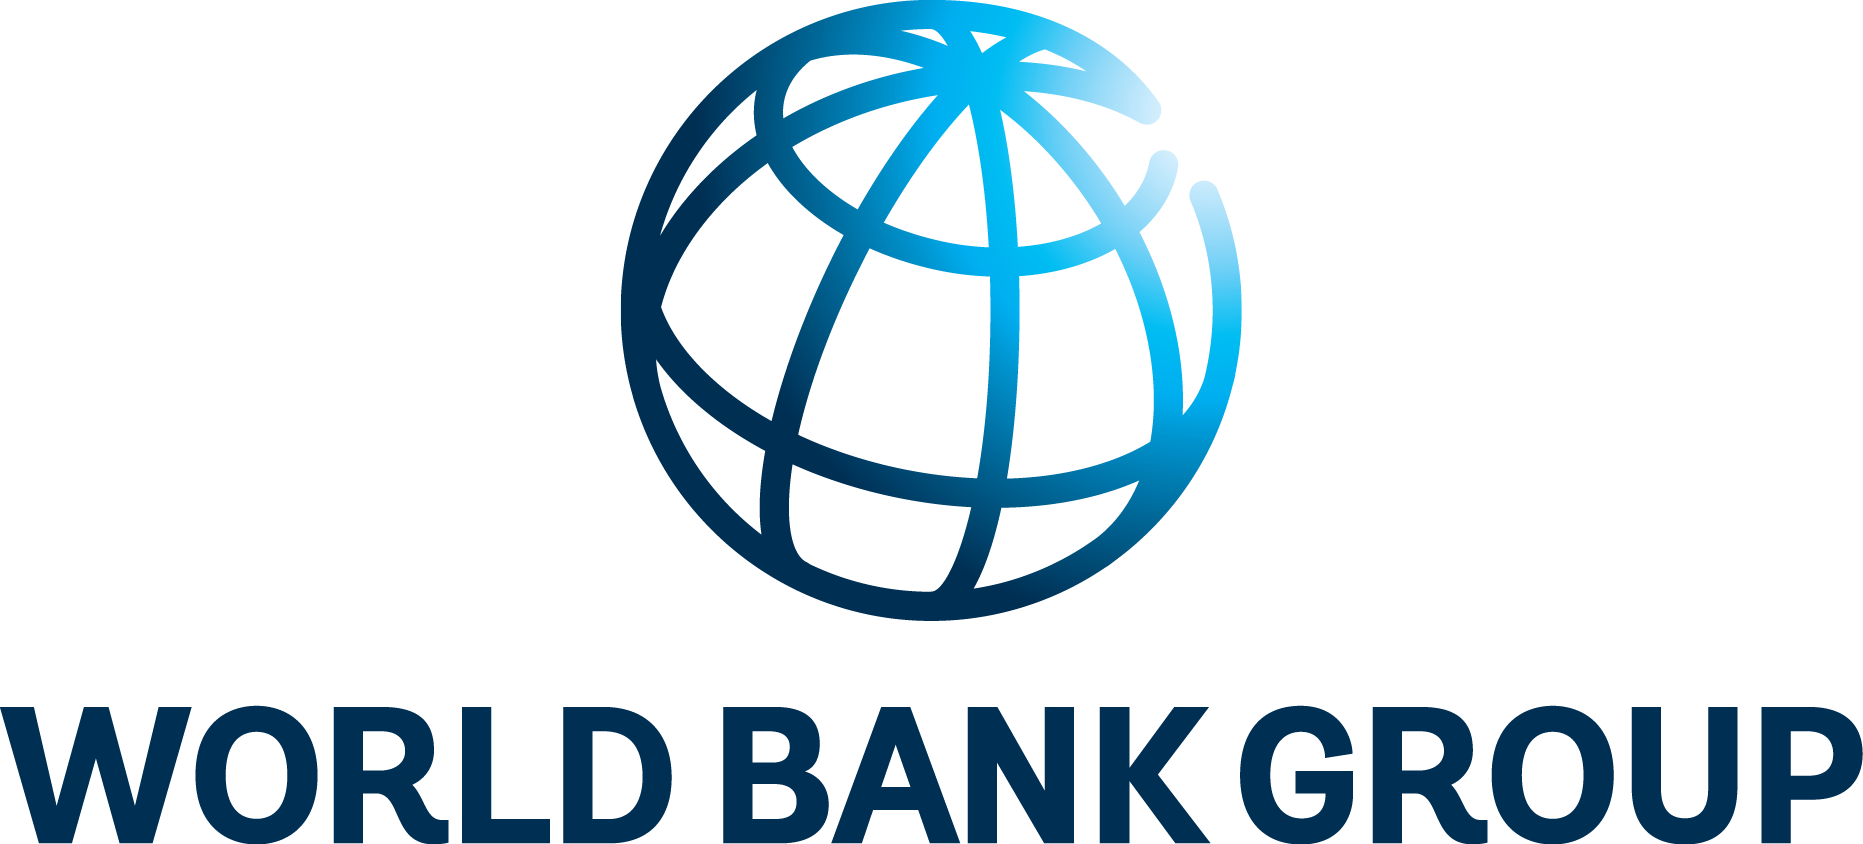

In [2]:
# datasets
df1 = pd.read_csv('/Users/luislasso/Repos/Proyecto_Final_Modelos_Predictivos/data/API_SP.POP.TOTL_DS2_en_csv_v2_76253.csv')
df2 = pd.read_csv('/Users/luislasso/Repos/Proyecto_Final_Modelos_Predictivos/data/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_76253.csv')

# Population Totals Dataset

This dataset contains information about country name and population from 1960 to 2023. The data is strucutred but years as used as columns names.

In [3]:
df1.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN


# Country Code Dataset

This dataset contains entity data for each country adding additional context to the analysis.

In [4]:
df2.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


# Data Preprossing.

Before analyzing the dataset I have created a data preprocessing class. This class contains a pipeline that unpivots the years on the facts dataset and joins the entity information from the second dataset.

In [8]:
# preprocessing
preprocessor = DataPreprocessor(df_fact=df1, df_dim=df2)


In [9]:
# Data Preprod Pipeline
df_cleaned = preprocessor.run_pipeline(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    value_vars=[str(i) for i in range(1960, 2023)],
    join_key='Country Code',
    how="left"
)

In [10]:
df_cleaned.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54922.0,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,1960,130072080.0,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,9035043.0,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,1960,97630925.0,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,1960,5231654.0,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


# EDA Analysis

This EDA will explore the following areas:

* Data Understanding
* Data Quality Checks
* Descriptive Statistics
* Trend Analysis
* Comparative Analysis
* Geospatial Analysis
* Predictice Insights




In [17]:
print("Dataset Info \n")
df_cleaned.info()

Dataset Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16758 entries, 0 to 16757
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    16758 non-null  object 
 1   Country Code    16758 non-null  object 
 2   Indicator Name  16758 non-null  object 
 3   Indicator Code  16758 non-null  object 
 4   Year            16758 non-null  object 
 5   Population      16665 non-null  float64
 6   Region          13671 non-null  object 
 7   IncomeGroup     13608 non-null  object 
 8   SpecialNotes    8001 non-null   object 
 9   TableName       16695 non-null  object 
 10  Unnamed: 5      0 non-null      float64
dtypes: float64(2), object(9)
memory usage: 1.4+ MB


In [18]:
df_cleaned.describe()

,Population,Unnamed: 5
count,1.666500e+04,0.0
mean,2.148219e+08,NaN
std,7.054458e+08,NaN
min,2.715000e+03,NaN
25%,9.995900e+05,NaN
50%,6.703172e+06,NaN
75%,4.657690e+07,NaN
max,7.989982e+09,NaN


In [20]:
df_cleaned.isna().mean()

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
Year              0.000000
Population        0.005550
Region            0.184211
IncomeGroup       0.187970
SpecialNotes      0.522556
TableName         0.003759
Unnamed: 5        1.000000
dtype: float64

In [22]:
df_cleaned.nunique()

Country Name        266
Country Code        266
Indicator Name        1
Indicator Code        1
Year                 63
Population        16472
Region                7
IncomeGroup           4
SpecialNotes        113
TableName           265
Unnamed: 5            0
dtype: int64

In [33]:
# Checking for empty popullation
df_empty_popullation = df_cleaned[df_cleaned['Population'].isna()]
print(df_empty_popullation['Country Name'].unique())
print(df_empty_popullation['Country Code'].unique())

['Not classified' 'West Bank and Gaza']
['INX' 'PSE']


In [37]:
india_popullation = df_cleaned[df_cleaned['Country Code']=='INX']
india_popullation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 110 to 16602
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    63 non-null     object 
 1   Country Code    63 non-null     object 
 2   Indicator Name  63 non-null     object 
 3   Indicator Code  63 non-null     object 
 4   Year            63 non-null     object 
 5   Population      0 non-null      float64
 6   Region          0 non-null      object 
 7   IncomeGroup     0 non-null      object 
 8   SpecialNotes    0 non-null      object 
 9   TableName       0 non-null      object 
 10  Unnamed: 5      0 non-null      float64
dtypes: float64(2), object(9)
memory usage: 5.9+ KB


In [38]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16758 entries, 0 to 16757
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    16758 non-null  object 
 1   Country Code    16758 non-null  object 
 2   Indicator Name  16758 non-null  object 
 3   Indicator Code  16758 non-null  object 
 4   Year            16758 non-null  object 
 5   Population      16665 non-null  float64
 6   Region          13671 non-null  object 
 7   IncomeGroup     13608 non-null  object 
 8   SpecialNotes    8001 non-null   object 
 9   TableName       16695 non-null  object 
 10  Unnamed: 5      0 non-null      float64
dtypes: float64(2), object(9)
memory usage: 1.4+ MB


In [41]:
df_cleaned["Region"].unique()

array(['Latin America & Caribbean', nan, 'South Asia',
       'Sub-Saharan Africa', 'Europe & Central Asia',
       'Middle East & North Africa', 'East Asia & Pacific',
       'North America'], dtype=object)

In [39]:
df_empty_region = df_cleaned[df_cleaned["Region"].isna()]

In [40]:
df_empty_region

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,1960,1.300721e+08,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,1960,9.763092e+07,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
7,Arab World,ARB,"Population, total",SP.POP.TOTL,1960,9.154085e+07,NaN,NaN,Arab World aggregate. Arab World is composed o...,Arab World,NaN
36,Central Europe and the Baltics,CEB,"Population, total",SP.POP.TOTL,1960,9.140176e+07,NaN,NaN,Central Europe and the Baltics aggregate.,Central Europe and the Baltics,NaN
49,Caribbean small states,CSS,"Population, total",SP.POP.TOTL,1960,1.713405e+06,NaN,NaN,Caribbean small states aggregate.,Caribbean small states,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16730,Middle East & North Africa (IDA & IBRD countries),TMN,"Population, total",SP.POP.TOTL,2022,4.271855e+08,NaN,NaN,Middle East & North Africa (IDA & IBRD countri...,Middle East & North Africa (IDA & IBRD),NaN
16732,South Asia (IDA & IBRD),TSA,"Population, total",SP.POP.TOTL,2022,1.932289e+09,NaN,NaN,South Asia (IDA & IBRD countries) aggregate.,South Asia (IDA & IBRD),NaN
16733,Sub-Saharan Africa (IDA & IBRD countries),TSS,"Population, total",SP.POP.TOTL,2022,1.229209e+09,NaN,NaN,Sub-Saharan Africa (IDA & IBRD countries) aggr...,Sub-Saharan Africa (IDA & IBRD),NaN
16741,Upper middle income,UMC,"Population, total",SP.POP.TOTL,2022,2.810662e+09,NaN,NaN,Upper middle income group aggregate. Upper-mid...,Upper middle income,NaN


In [42]:
df_empty_region["Country Name"].unique()

array(['Africa Eastern and Southern', 'Africa Western and Central',
       'Arab World', 'Central Europe and the Baltics',
       'Caribbean small states',
       'East Asia & Pacific (excluding high income)',
       'Early-demographic dividend', 'East Asia & Pacific',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia', 'Euro area', 'European Union',
       'Fragile and conflict affected situations', 'High income',
       'Heavily indebted poor countries (HIPC)', 'IBRD only',
       'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only',
       'Not classified',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & Caribbean',
       'Least developed countries: UN classification', 'Low income',
       'Lower middle income', 'Low & middle income',
       'Late-demographic dividend', 'Middle East & North Africa',
       'Middle income',
       'Middle East & North Africa (excluding high income)',
       'North America', 

In [43]:
df_cleaned["Country Name"].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
 